<a href="https://colab.research.google.com/github/LXHayato/Sawing_RL_Q/blob/Learning01/sawing_Reinforcement_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

今は0周目
今は500周目
今は1000周目
今は1500周目
今は2000周目
今は2500周目
今は3000周目
今は3500周目
今は4000周目
今は4500周目


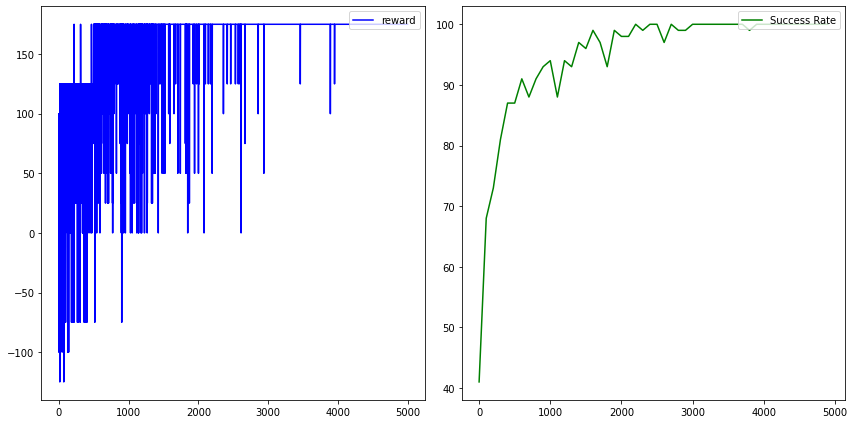

In [ ]:
#とりあえずカテドラルローブのみ
import numpy as np
import matplotlib.pyplot as plt
import copy

#変数の定義
action = None
reward = None

#Q学習
class QL_Agent:
  def __init__(self, epsilon=0.1,alpha=.2, gamma=.99, actions=None, observation=None):
    self.alpha=alpha
    self.gamma=gamma
    self.epsilon=epsilon
    self.reward_history=[]
    self.actions=actions
    self.state=str(observation)
    self.ini_state=str(observation)
    self.previous_map=None
    self.previous_action=None
    self.q_values=self._init_q_values()

#Qテーブルの初期化
  def _init_q_values(self):
    q_values={}
    q_values[self.state]=np.repeat(0.0, len(self.actions))
    return q_values

#状態の初期化
  def init_state(self):
    self.previous_map=copy.deepcopy(self.ini_state)
    self.state=copy.deepcopy(self.ini_state)
    return self.state

#ε-greedy選択
  def act(self, nb_episode):
    #ランダム行動
    if episode == 0:
      self.epsilon = 1
    #elif episode > 3000:
      #self.epsilon = 0
    else:
      self.epsilon = (np.log(nb_episode)-np.log(episode))/np.log(nb_episode)*(np.log(nb_episode)-np.log(episode))/np.log(nb_episode)
    if np.random.uniform() < self.epsilon:
      action=np.random.randint(0, len(self.q_values[self.state]))
    #greedy行動
    else:
      action=np.argmax(self.q_values[self.state])

    self.previous_action=action
    return action

#次の状態と報酬の観測
  def observe(self, next_map, reward=None):
    next_map=str(next_map)
    #初めての状態であれば
    if next_map not in self.q_values:
      self.q_values[next_map]=np.repeat(0.0, len(self.actions))

    self.previous_map=copy.deepcopy(self.state)
    self.state=next_map

    if reward is not None:
      self.reward_history.append(reward)
      self.learn(reward)
    
#Q値の更新
  def learn(self, reward):
    q=self.q_values[self.previous_map][self.previous_action]
    max_q=max(self.q_values[self.state])
    self.q_values[self.previous_map][self.previous_action]=q+(self.alpha*(reward+(self.gamma*max_q)-q))


#World
class World:
  def __init__(self):
    self.actions ={
        "UL":0,"UC":1,"UR":2,"CL":3,"CC":4,"CR":5,"DL":6,"DC":7,"DR":8
    }

#布初期値
    self.Start_map=np.array([[25,0,0],
                   [0,50,0],
                   [0,0,25]])
#布現在値
    self.Now_map = copy.deepcopy(self.Start_map)


#集中力
#Lv60、光の針時
#    self.start_con = 213
#    self.agent_con = copy.deepcopy(selfstart_con)

#行動の実行
#状態、報酬、ゴールしたかを返却

  def step(self, action, n):  
    Cloth=np.sum(abs(self.Now_map))
    #Cloth = copy.deepcopy(self.agent_con)
    n+=1

#ひとまずこの書き方に乗っ取って、集中力が足りない行動も選べるようにする。
#選んだら、何も起こらず報酬を減らす。
#      if self._is_possible_action(Concentration, action) == False:
#        return self.agent_con, -1, False

    if action == self.actions["UL"]:
      self.Now_map[0][0]-=25
    elif action == self.actions["UC"]:
      self.Now_map[0][1]-=25
    elif action == self.actions["UR"]:
      self.Now_map[0][2]-=25
    elif action == self.actions["CL"]:
      self.Now_map[1][0]-=25
    elif action == self.actions["CC"]:
      self.Now_map[1][1]-=25
    elif action == self.actions["CR"]:
      self.Now_map[1][2]-=25
    elif action == self.actions["DL"]:
      self.Now_map[2][0]-=25
    elif action == self.actions["DC"]:
      self.Now_map[2][1]-=25
    elif action == self.actions["DR"]:
      self.Now_map[2][2]-=25

#エピソード終了の確認

    Cloth=np.sum(abs(self.Now_map))
    reward = self._compute_reward(Cloth, n)
    is_goal = self._is_end_episode(n,Cloth)
    return self.Now_map, reward, is_goal, n

#報酬
#0からの剥離量*5がそのまま点数となる。
  def _compute_reward(self, Cloth, n):
    if n < 4:
      return 50-Cloth*0.5
    else:
      return 100-Cloth


#終了条件の確認
#今はn=38で終了
  def _is_end_episode(self,n,Cloth):
   
    if n == 4:
      n = 0
      return True
    elif Cloth <= 8:
      n = 0
      return True
    else:
      return False

  def reset(self):
    self.Now_map=copy.deepcopy(self.Start_map)
    return self.Start_map

#if __name__ =='__main':
grid_env=World()
ini_state=grid_env.Start_map
agent = QL_Agent(epsilon=0.1,actions=np.arange(9),observation=ini_state)
nb_episode = 5000
episode_No = [0.0 for i in range(int(nb_episode/100))]
Success = np.array([0.0 for i in range(int(nb_episode/100))])
rewards = []
is_end_episode = False
for episode in range(nb_episode):
  if episode % 500 == 0:
    print(f'今は{episode}周目')
  episode_reward = []
  n = 0
  while(is_end_episode == False):
    action = agent.act(nb_episode)
    state, reward, is_end_episode, n = grid_env.step(action, n)
    agent.observe(state, reward)
    episode_reward.append(reward)
  rewards.append(np.sum(episode_reward))
  state = grid_env.reset()
  agent.observe(state)
  is_end_episode = False
  if np.sum(episode_reward) > 120:
    Success[int(episode/100)] += 1

#結果のプロット
#figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
fig = plt.figure(figsize=(12, 6))

#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

y1 = np.arange(nb_episode)
y2 = np.arange(0,nb_episode,100)

c1,c2 = "blue","green"  # 各プロットの色
l1,l2 = "reward","Success Rate"   # 各ラベル

ax1.plot(y1, rewards, color=c1, label=l1)
ax2.plot(y2, np.array(Success/100)*100, color=c2, label=l2)
ax1.legend(loc = 'upper right') #凡例
ax2.legend(loc = 'upper right') #凡例
fig.tight_layout()              #レイアウトの設定
plt.show()


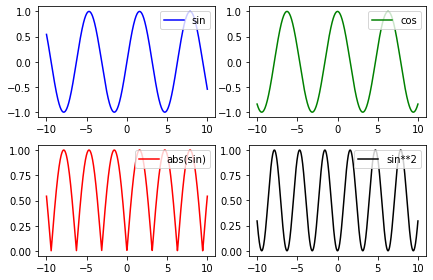

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
fig = plt.figure()

#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

c1,c2,c3,c4 = "blue","green","red","black"      # 各プロットの色
l1,l2,l3,l4 = "sin","cos","abs(sin)","sin**2"   # 各ラベル

ax1.plot(t, y1, color=c1, label=l1)
ax2.plot(t, y2, color=c2, label=l2)
ax3.plot(t, y3, color=c3, label=l3)
ax4.plot(t, y4, color=c4, label=l4)
ax1.legend(loc = 'upper right') #凡例
ax2.legend(loc = 'upper right') #凡例
ax3.legend(loc = 'upper right') #凡例
ax4.legend(loc = 'upper right') #凡例
fig.tight_layout()              #レイアウトの設定
plt.show()